# About Dataset

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

## Import modules

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv("/kaggle/input/loan-prediction-sample/Loan Prediction Dataset.csv")

In [104]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocess

In [106]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
# fill values using mean in numerical
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

In [108]:
# fill values using mode for catergorical values
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Loan_Status"] = df["Loan_Status"].fillna(df["Loan_Status"].mode()[0])

In [109]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label Encoder

In [110]:
# converting categorical values
# from sklearn.preprocessing import LabelEncoder
# cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
# le = LabelEncoder()
# for col in cols:
#     df[col] = le.fit_transform(df[col])

In [111]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


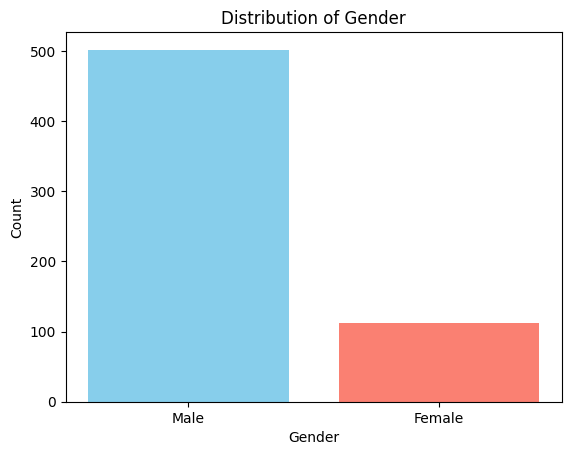

In [112]:
gender_counts = df['Gender'].value_counts()

# Define custom colors for each category
colors = ['skyblue', 'salmon']

# Plotting the bar chart with custom colors
plt.bar(gender_counts.index, gender_counts, color=colors)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Display the plot
plt.show()

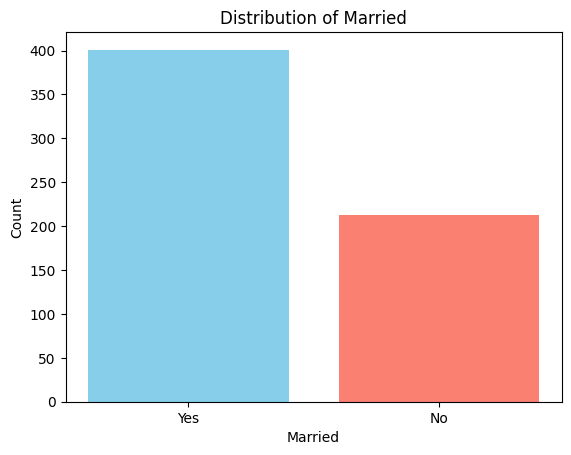

In [113]:
gender_counts = df['Married'].value_counts()

# Define custom colors for each category
colors = ['skyblue', 'salmon']

# Plotting the bar chart with custom colors
plt.bar(gender_counts.index, gender_counts, color=colors)

# Adding labels and title
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Distribution of Married')

# Display the plot
plt.show()

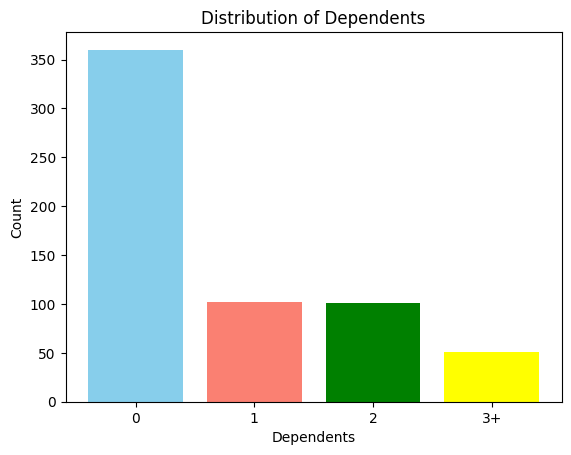

In [114]:
gender_counts = df['Dependents'].value_counts()

# Define custom colors for each category
colors = ['skyblue', 'salmon', 'green', 'yellow']

# Plotting the bar chart with custom colors
plt.bar(gender_counts.index, gender_counts, color=colors)

# Adding labels and title
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Distribution of Dependents')

# Display the plot
plt.show()

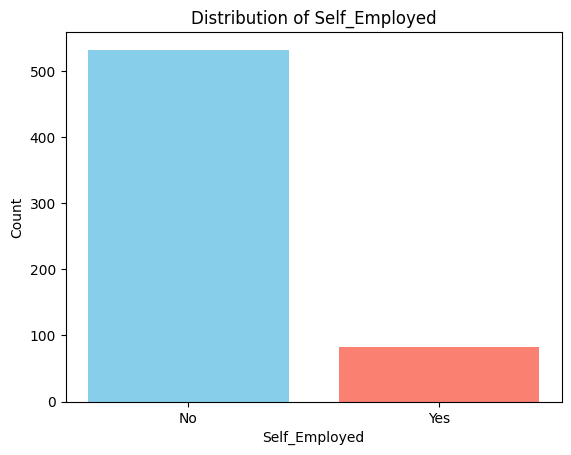

In [115]:
gender_counts = df['Self_Employed'].value_counts()

# Define custom colors for each category
colors = ['skyblue', 'salmon']

# Plotting the bar chart with custom colors
plt.bar(gender_counts.index, gender_counts, color=colors)

# Adding labels and title
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Distribution of Self_Employed')

# Display the plot
plt.show()

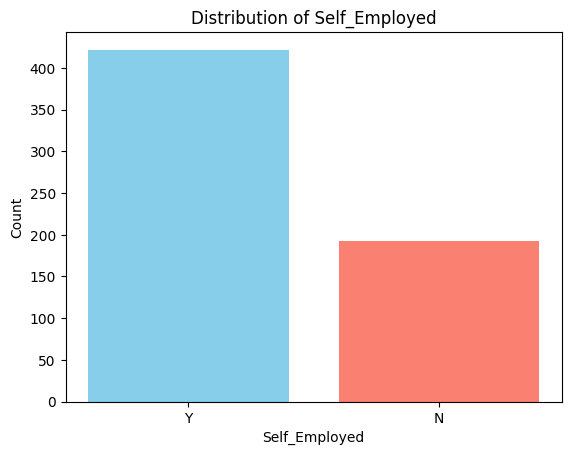

In [116]:
gender_counts = df['Loan_Status'].value_counts()

# Define custom colors for each category
colors = ['skyblue', 'salmon']

# Plotting the bar chart with custom colors
plt.bar(gender_counts.index, gender_counts, color=colors)

# Adding labels and title
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Distribution of Self_Employed')

# Display the plot
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

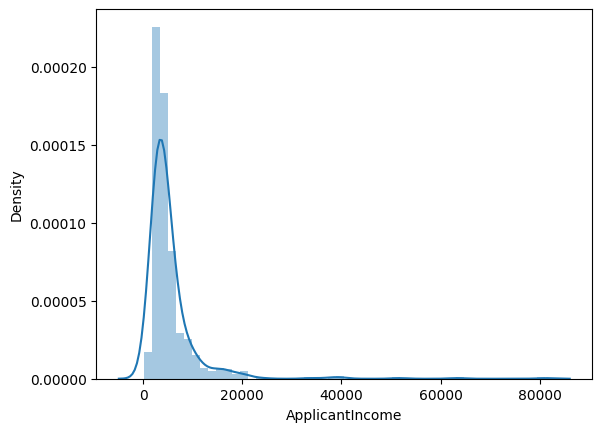

In [117]:
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

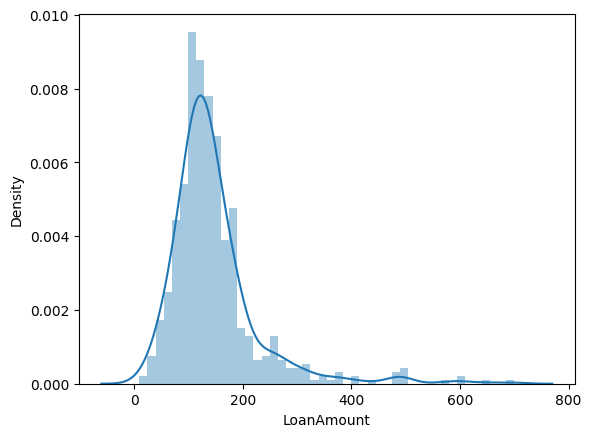

In [118]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

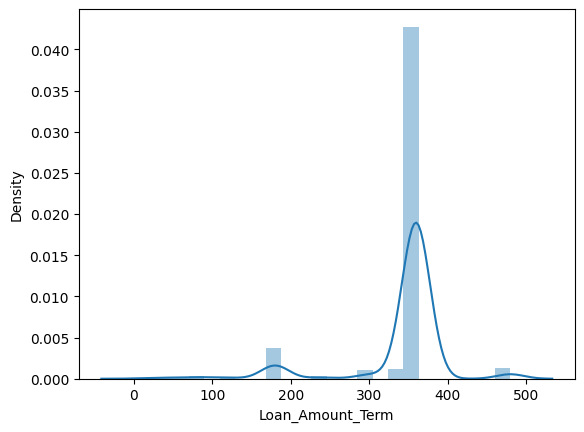

In [119]:
sns.distplot(df["Loan_Amount_Term"])

## creating new attributes

In [120]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [124]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
df["ApplicantIncomeLog"] = np.log(df["ApplicantIncome"]+1)

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

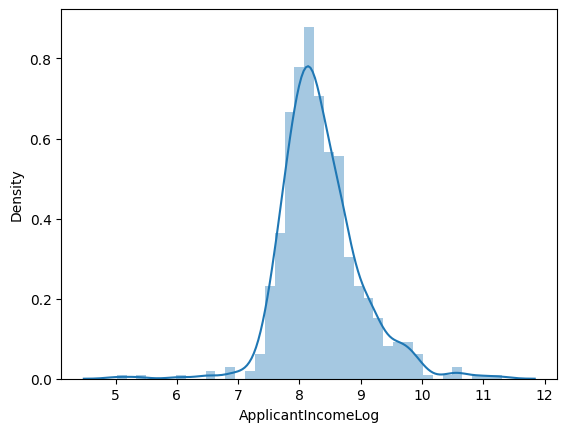

In [125]:
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

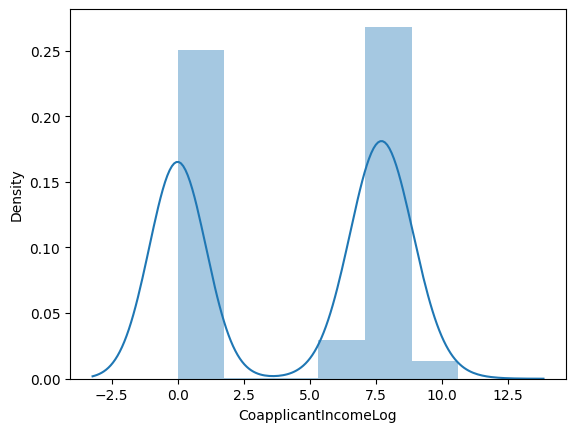

In [126]:
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

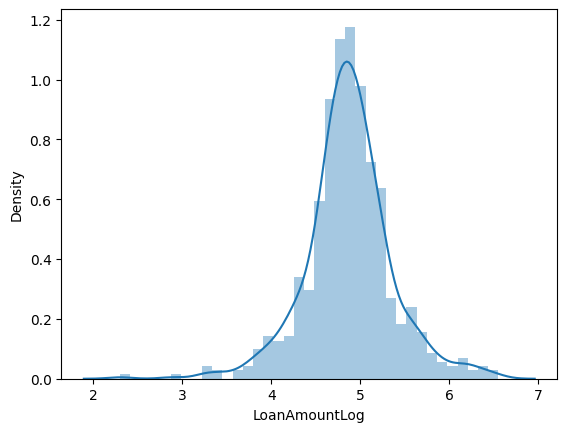

In [127]:
sns.distplot(df["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

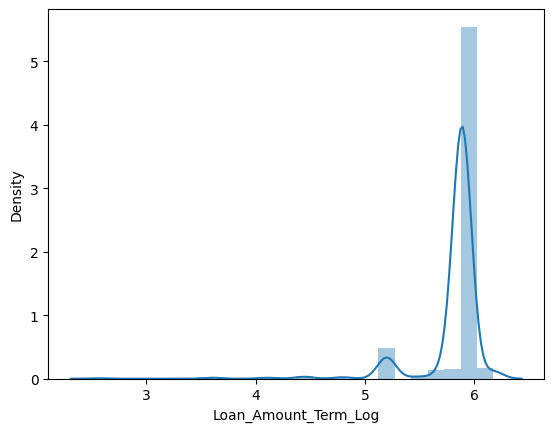

In [128]:
sns.distplot(df["Loan_Amount_Term_Log"])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

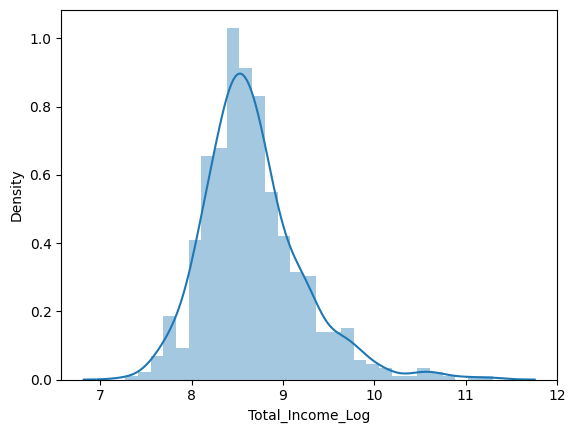

In [129]:
sns.distplot(df["Total_Income_Log"])

In [131]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,Loan_Amount_Term_Log,LoanAmountLog,ApplicantIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,5.888878,4.993232,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714732,5.888878,4.859812,8.430327
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,5.888878,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505525,5.888878,4.795791,7.857094
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,5.888878,4.955827,8.699681


## Label Encoding

In [132]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,Loan_Amount_Term_Log,LoanAmountLog,ApplicantIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674197,5.888878,4.993232,8.674197
1,1,1,1,0,0,1.0,0,0,8.714732,5.888878,4.859812,8.430327
2,1,1,0,0,1,1.0,2,1,8.006701,5.888878,4.204693,8.006701
3,1,1,0,1,0,1.0,2,1,8.505525,5.888878,4.795791,7.857094
4,1,0,0,0,0,1.0,2,1,8.699681,5.888878,4.955827,8.699681


## Model Training

In [135]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [137]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [142]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [139]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 70.77922077922078
Cross validation is 70.20125283220044


In [140]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 78.01546048247367


In [141]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 76.87591630014661


## Save the model

In [143]:
import pickle

# knn_model is trained model
filename = "/kaggle/working/LogisticRegression_model.sav"

# Open the file in binary write mode ("wb")
with open(filename, "wb") as file:
    pickle.dump(model, file)

## Load the model

In [144]:
load_model = pickle.load(open(filename, "rb"))

In [155]:
x_test.tail()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income_Log,Loan_Amount_Term_Log,LoanAmountLog,ApplicantIncomeLog
67,1,1,1,0,0,1.0,2,9.282754,5.888878,5.746203,9.282754
484,1,1,2,0,0,1.0,1,9.028099,5.888878,5.509388,9.028099
307,0,0,0,0,0,0.0,2,8.357963,5.888878,4.653960,7.783641
459,1,1,0,0,0,1.0,1,9.028219,5.888878,5.081404,9.028219
35,1,1,0,0,0,1.0,2,8.376321,5.888878,4.993232,7.730175


In [154]:
y_test.tail()

67     1
484    1
307    0
459    0
35     1
Name: Loan_Status, dtype: int64

In [157]:
loan = ["No", "Yes"]
# [1,0,0,1,0,1.0,1,8.822322,5.888878,4.875197,8.822322] answer Yes preciction Correct
# [0,0,2,0,0,1.0,1,8.671458,5.888878,4.795791,8.229778] answer Yes preciction Correct
# [1,1,0,0,0,1.0,0,8.950403,5.888878,5.170484,8.624971] answer NO preciction Wrong
# [0,0,0,0,0,0.0,2,8.357963,5.888878,4.653960,7.783641] answer NO preciction Correct
var = load_model.predict([[0,0,0,0,0,0.0,2,8.357963,5.888878,4.653960,7.783641]])
print(loan[var[0]])

No
